<a href="https://colab.research.google.com/github/Hashirama-789/Cliff-Walking-RL/blob/main/Capstone_1_Solving_cliff_walking_with_Q_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Solving Cliff Walking with Q Learning




# Cliff Walking description

This environment is a 4x12 grid, 4 rows and 12 columns. The player starts at location [3, 0], and tries to reach the goal at [3, 11]. The episode ends when the player reaches the goal.

There is a cliff along the fourth row along [3, 1...10]. If the player moves to a cliff location, it returns to the start location.



# Reinforcement learning problem description

Action Space:


*   0: Move up
*   1: Move right

* 2: Move down

* 3: Move left



Observation Space:

There are 3x12 + 1  = 37 possible states the player can be in. The player cannot be at the cliff, and cannot be at the goal since that would end the episode. The remaining locations are the first three rows plus the start location.

The observation state is a number (an int()) representing the player's current location, calculated by current_row * ncols + current_col (where both the row and col start at 0). For example, the starting position is calculated as follows: 3 * 12 + 0 = 36.



Starting State: The episode starts in state [36] (location [3, 0]).

Reward: Each time step gives a reward of -1, but stepping into the cliff gives a reward of -100.

Episode End: The episode ends when the player enters state [47] (location [3, 11]).



In [ ]:
!pip install gymnasium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 14.7 MB/s eta 0:00:00


array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]], dtype=uint8)
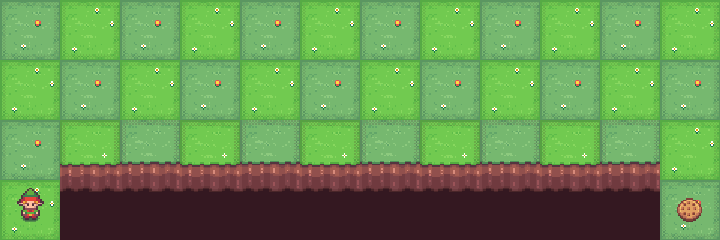

In [ ]:
import gymnasium as gym
import time

env = gym.make('CliffWalking-v0', render_mode='rgb_array')
env.reset()
env.render()

In [ ]:
env.nS, env.nA

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.nS to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.nS` for environment variables or `env.get_wrapper_attr('nS')` that will search the reminding wrappers.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.nA to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.nA` for environment variables or `env.get_wrapper_attr('nA')` that will search the reminding wrappers.
  logger.warn(


(48, 4)

There are 48 states and 4 actions in this environment.

array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]], dtype=uint8)
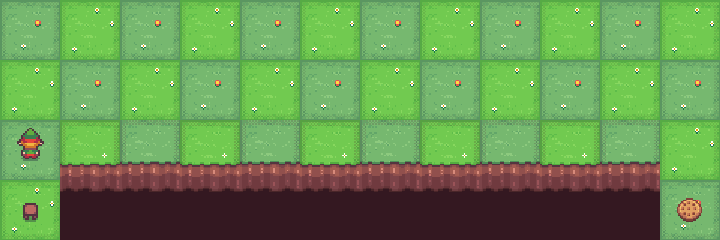

In [ ]:
env.step(0) # action 0 is up
env.render()

array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]], dtype=uint8)
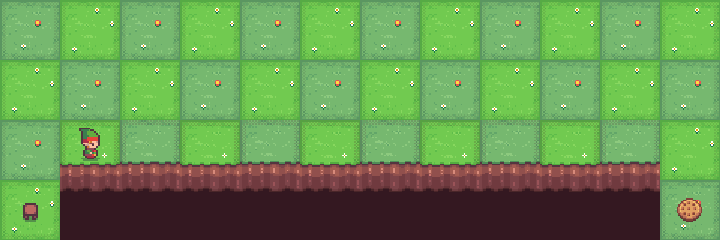

In [ ]:
env.step(1) # action 1 is right
env.render()

Create Q table.

In [ ]:
import numpy as np

Q = np.zeros((env.nS, env.nA))
print(Q)
print(Q.shape)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
(48, 4)


In [ ]:

# Q = np.zeros((env.nS, env.nA))
# episode=[]
# state, _ = env.reset()
# for i in range(5):
#   value_noise = np.random.randn(1, env.nA)*(1./(i+1))
#   action = np.argmax(Q[state] + value_noise) # choose the best action
#   next_state, reward, done, _, _ = env.step(action) # take the action, move to a new state, and get reward
#   Q[state, action] = reward + 0.95 * np.max(Q[next_state]) # update Q table
#   state = next_state
#   print(state)

# print(state)
# print(len(episode))
# print(episode)



Go through episodes in the environment and update Q.

In [ ]:
num_episodes = 50
gamma = 0.95

Q = np.zeros((env.nS, env.nA))

rewards = [] # total reward of each episode
best_reward = -2000 # best reward across all episodes
best_episode = []

for i in range(num_episodes):
  episode = [36] # animation for current episode, start with the start location
  episode_reward = 0
  state, _ = env.reset()   # for each episode, reset environment
  done = False
  while not done:
    value_noise = np.random.randn(1, env.nA)*(1./(i+1))
    action = np.argmax(Q[state] + value_noise) # choose the best action
    next_state, reward, done, _, _ = env.step(action) # take the action, move to a new state, and get reward
    Q[state, action] = reward + gamma * np.max(Q[next_state]) # update Q table
    state = next_state

    episode_reward += reward
    episode.append(state)

  if (i+1) % 1 == 0:
    print(f'Episode {i+1} reward: {episode_reward}')

  if episode_reward > best_reward:
    best_reward = episode_reward
    best_episode = episode

  rewards.append(episode_reward)

print(Q)
print('Average reward for the first 10 episodes:', np.mean(rewards[:10]))
print('Average reward for the last 10 episodes:', np.mean(rewards[-10:]))



Episode 1 reward: -1527
Episode 2 reward: -44
Episode 3 reward: -90
Episode 4 reward: -83
Episode 5 reward: -49
Episode 6 reward: -79
Episode 7 reward: -42
Episode 8 reward: -59
Episode 9 reward: -35
Episode 10 reward: -85
Episode 11 reward: -45
Episode 12 reward: -21
Episode 13 reward: -23
Episode 14 reward: -56
Episode 15 reward: -24
Episode 16 reward: -27
Episode 17 reward: -31
Episode 18 reward: -32
Episode 19 reward: -26
Episode 20 reward: -26
Episode 21 reward: -16
Episode 22 reward: -13
Episode 23 reward: -15
Episode 24 reward: -22
Episode 25 reward: -35
Episode 26 reward: -33
Episode 27 reward: -17
Episode 28 reward: -14
Episode 29 reward: -15
Episode 30 reward: -19
Episode 31 reward: -13
Episode 32 reward: -13
Episode 33 reward: -13
Episode 34 reward: -13
Episode 35 reward: -13
Episode 36 reward: -13
Episode 37 reward: -13
Episode 38 reward: -13
Episode 39 reward: -13
Episode 40 reward: -13
Episode 41 reward: -13
Episode 42 reward: -13
Episode 43 reward: -13
Episode 44 reward:

States that the agent went through for the best episode.

In [ ]:
print(len(best_episode))
print(best_episode)
print(best_reward)

14
[36, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 47]
-13


array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]], dtype=uint8)
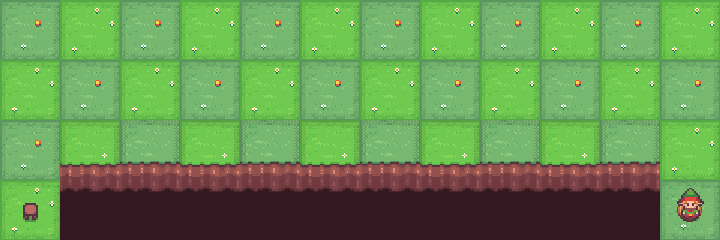

In [ ]:
env.render()

In the future, I will:

*   Figure out how to make visualization to see the player moving step by step in the environment rather than just listing out the states it's going through
*   Make a more complicated environment such as a tilted cliff, and make the state and action space more complicated by making them continuous rather than discrete -> will need to use deep learning

